## CS 231N-kaggle amazon forest challenge

In [78]:
# some set up
import sys
import math
import os
import skimage.io as io
import imp
import prep_utils
prep_utils = imp.reload(prep_utils)
from prep_utils import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
import time
%matplotlib inline

In [101]:
# get unique list of labels from training csv
data_root = 'data/'
TRAIN_LABEL_CSV_PATH = os.path.join(data_root, 'train.csv')
y, label_list, _, tags = prep_utils.read_labels(TRAIN_LABEL_CSV_PATH)
print(y.shape)

(40479, 17)


In [5]:
print(label_list)
print(y_train[:10])

['clear', 'haze', 'partly_cloudy', 'cloudy', 'primary', 'agriculture', 'water', 'habitation', 'road', 'cultivation', 'blooming', 'selective_logging', 'slash_burn', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blow_down']
[[ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]]


### process raw training and test data and save the processed data into .npz

In [25]:
# processing training data (uncomment if processing raw data)
# x_train, y_train, x_val, y_val = process_raw_data_train(data_root, train_ratio = 0.9)

Necessary data:
data/train.csv
data/test.csv
data/train-jpg/
data/test-jpg/
data/test-jpg-additional/
data/train-tif
data/test-tif
Processing training data .....
Processing 2000-th image in total 40479 images, elapsed time 8.449619
Processing 4000-th image in total 40479 images, elapsed time 16.811738
Processing 6000-th image in total 40479 images, elapsed time 24.522971
Processing 8000-th image in total 40479 images, elapsed time 32.926473
Processing 10000-th image in total 40479 images, elapsed time 49.769312
Processing 12000-th image in total 40479 images, elapsed time 248.076818
Processing 14000-th image in total 40479 images, elapsed time 443.647994
Processing 16000-th image in total 40479 images, elapsed time 646.332277
Processing 18000-th image in total 40479 images, elapsed time 842.187099
Processing 20000-th image in total 40479 images, elapsed time 1041.436626
Processing 22000-th image in total 40479 images, elapsed time 1236.622351
Processing 24000-th image in total 40479 im

In [ ]:
# processing test data (TBD)
x_test, y_test = process_raw_data_test(data_root)

## load processed training and evaluation data:

In [117]:
tic = time.time()
npzfile = np.load(os.path.join(data_root,'data_train_processed_new.npz'))
x_train, y_train, x_val, y_val  = \
            npzfile['x_train'],npzfile['y_train'],npzfile['x_val'],npzfile['y_val']
toc = time.time()
print(toc-tic)

27.25875449180603


In [118]:
# tic = time.time()
# np.savez(os.path.join(data_root,'data_train_processed_new'),x_train=x_train, y_train=y_train,
#                             x_val=x_val, y_val=y_val)
# toc = time.time()
# print(toc-tic)
print('x_train:',x_train.shape)
print('y_train',y_train.shape)
print('x_val', x_val.shape)
print('y_val', y_val.shape)

x_train: (36000, 256, 256, 4)
y_train (36000, 17)
x_val (4479, 256, 256, 4)
y_val (4479, 17)


## Create small dataset for testing the code

In [108]:
n_train_small = 1000
n_val_small = 100
mask_train_small = np.random.choice(y_train.shape[0], n_train_small, replace=False)
mask_val_small = np.random.choice(y_val.shape[0], n_val_small, replace=False)
x_train_small = x_train[mask_train_small]
y_train_small = y_train[mask_train_small]
x_val_small   = x_val[mask_val_small]
y_val_small   = y_val[mask_val_small]

print('x_train_small:',x_train_small.shape)
print('y_train_small',y_train_small.shape)
print('x_val_small', x_val_small.shape)
print('y_val_small', y_val_small.shape)
np.savez(os.path.join(data_root,'train_data_small'),x_train=x_train_small, y_train=y_train_small,
                            x_val=x_val_small, y_val=y_val_small)

x_train_small: (1000, 256, 256, 4)
y_train_small (1000, 17)
x_val_small (100, 256, 256, 4)
y_val_small (100, 17)


## try loading the small data

In [115]:
npzfile_small = np.load(os.path.join(data_root,'train_data_small.npz'))
print(npzfile_small['x_val'].shape)

(100, 256, 256, 4)


## Some sample training images in jpg

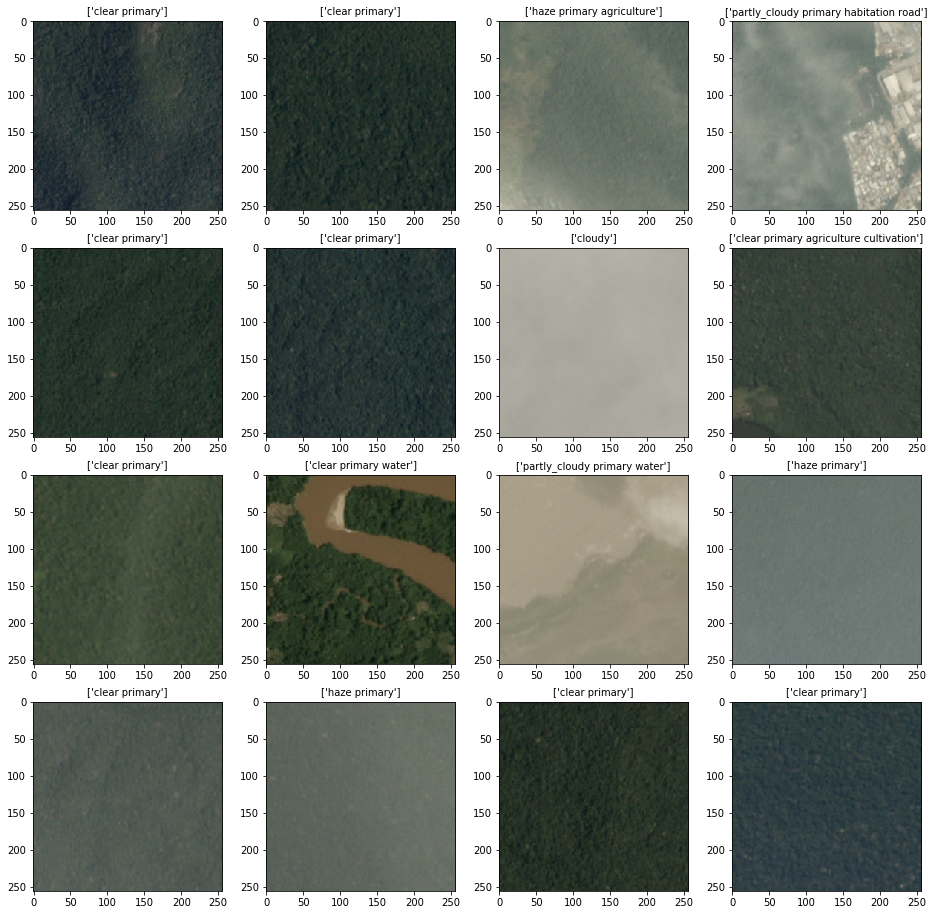

In [100]:
plt.rcParams['figure.figsize'] = (16.0, 16.0) # set default size of plots
index = np.random.choice(x_train.shape[0], 16, replace=False)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[index[i],:,:,:3])
    plt.title(y2tags(y_train[index[i],:], label_list),fontsize=10)

## Some statistics